# Will Pueyo's Prediction Come True?

On **June 26, 2020**, Tomas Pueyo tweeted a warning about the worrysome trend in the growth of COVID-19 confirmed cases in the US over the previous two weeks. Pueyo's tweet includes a prediction showing the US daily case growth rate hitting around 50,000 cases/day by 4th of July. 

![image.jpg](image.jpg)

Source: https://twitter.com/tomaspueyo/status/1276464644429766672

Pueyo's warning comes with the annotation:

> What will happen over the next <br>
> 3 weeks if the growth rate from <br>
> the last week continues <br>
> (it probably won't, it usually <br>
> slows down a bit. But it gives us <br>
> a sense of orders of magnitude) <br>

This Jupyter notebook can be used to check the evolution of new cases in the US using the Johns Hopkins CSSE COVID-19 database availble at github and see if Pueyo's prediction comes true. The notbook requires Python3, matplotlib, and pandas, but is otherwise free of package dependencies that can make using other-people's-Python-code painful.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd

A utility function to plot 7-day rolling averages of the COVID-19 time-series data (after some minor tinkering)...

In [2]:
def plotRollingAvg(df, ax, names, title, logscale=False):
    for name in names:
        ax.plot(pd.to_datetime(df.loc[name].index), 
                df.loc[name].diff().rolling(window=7).mean(), 
                linewidth=2,
                label=name)

    _, ax2 = ax.get_xlim()
    ax.set_xlim(ax2-120.0, ax2)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

    if logscale:
        ax.set_yscale('log')
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_minor_locator(plt.NullLocator())

    ax.legend(loc='best', prop={'size': 12})
    if title:
        ax.title.set_text(title+', 7-Day Rolling Avg')
    ax.grid(color='#d4d4d4')

### Let's go to the data...
1. Load time-series of confirmed cases directly from github repo into pandas dataframe.
2. Drop unused columns from the dataframe.
3. Group and aggregate (i.e. sum) results.

In [3]:
# Load global time-series so we can compare US vs EU
df_global = pd.read_csv(
    ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'
     'csse_covid_19_data/csse_covid_19_time_series/'
     'time_series_covid19_confirmed_global.csv'))
df_global = df_global.drop(columns=['Province/State','Lat', 'Long'])
df_global = df_global.groupby('Country/Region').agg('sum')
# Add row for EU totals
eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
      'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
      'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']
df_global.loc['EU+UK',:] = df_global.loc[eu].sum()

# Load US data so we can look at the four most populous states
df_us = pd.read_csv(
    ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'
     'csse_covid_19_data/csse_covid_19_time_series/'
     'time_series_covid19_confirmed_US.csv'))
df_us = df_us.drop(columns=[
    'UID', 'iso2', 'iso3', 'code3', 'FIPS', 
    'Admin2', 'Country_Region','Lat', 'Long_'])
df_us = df_us.groupby('Province_State').agg('sum')
# Add row for US total (not needed or used)
df_us.loc['United States',:] = df_us.sum(axis=0)

4. Plot overall results for the US and EU+UK.
5. **Bonus**: A second plot shows individual state results for the four most populous states in the US. 

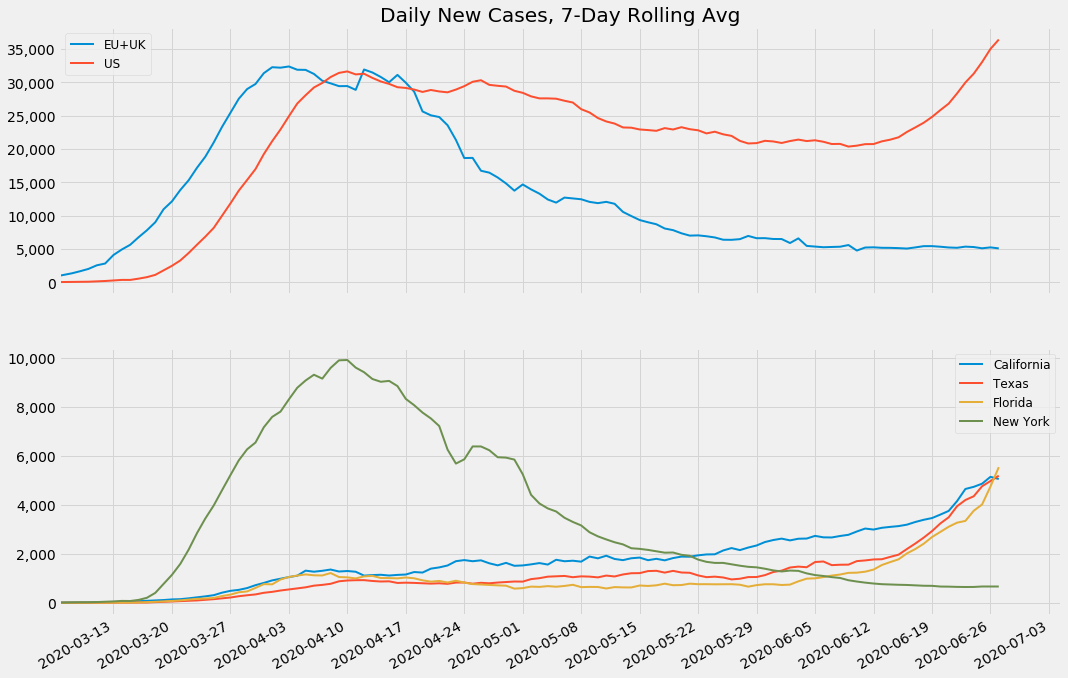

In [4]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16, 12))
plotRollingAvg(df_global, ax1, ['EU+UK', 'US'], 'Daily New Cases')
states = ['California', 'Texas', 'Florida', 'New York']
plotRollingAvg(df_us, ax2, states, '')
fig.autofmt_xdate() 

### Recommended Reading:
- [Coronavirus: The Hammer and the Dance](https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56), Tomas Pueyo, Medium, 19 Mar 2020.